In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


 # 0. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    return upper_bound, lower_bound

In [3]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(104.7, 16.700000000000003)

In [4]:
df.Flyers.min()

-38

### 1.A-B 

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper and lower outliers make sense?Which outliers should be kept?

104.7
16.700000000000003


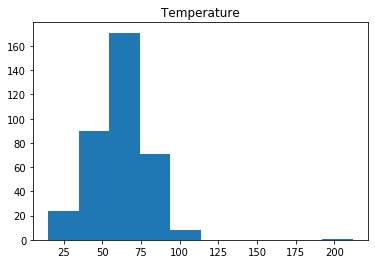

1.3
0.26


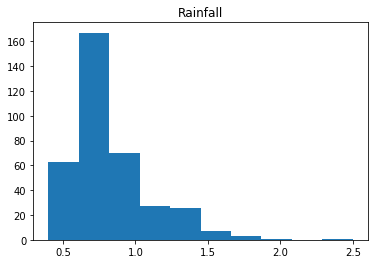

76.0
4.0


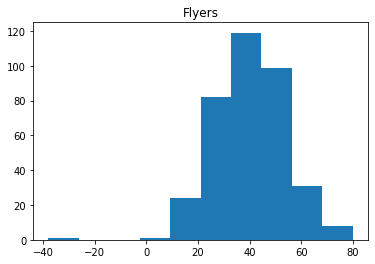

0.5
0.5


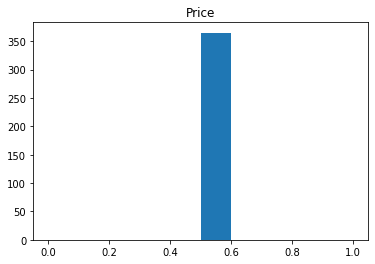

45.0
5.0


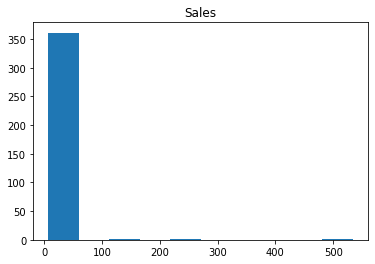

In [5]:
sel_cols = ['Temperature','Rainfall','Flyers','Price','Sales']
for col in sel_cols:
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], 1.5)
    print(lower_bound)
    print(upper_bound)
    plt.title(col)
    plt.hist(df[col])
    plt.show()
    

- Temperature
-- 200 degree weather needs to be removed

- Rainfall
-- Outliers should be kept, rainfall seems reasonable

- Fliers
-- lower outliers should be removed. Negative flyer count must be a mistake.

- Price
-- No outliers

- Sales
-- Outliers should be kept.

### 1.C-D

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

137.7
-16.299999999999997


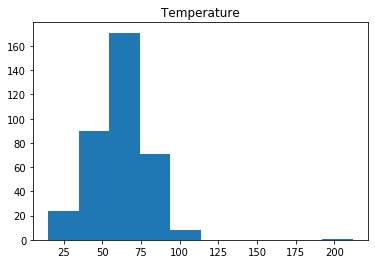

1.69
-0.13


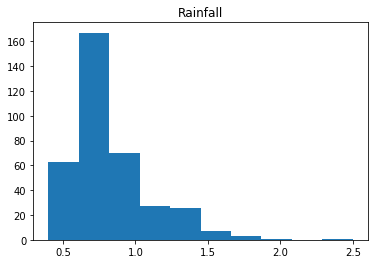

103.0
-23.0


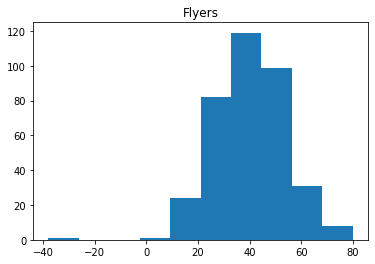

0.5
0.5


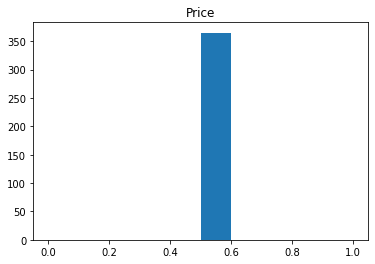

60.0
-10.0


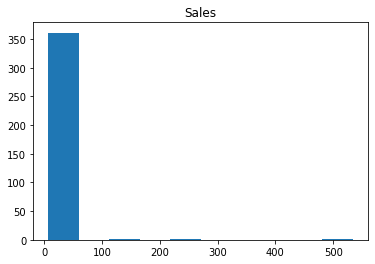

In [6]:
sel_cols = ['Temperature','Rainfall','Flyers','Price','Sales']
for col in sel_cols:
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], 3)
    print(lower_bound)
    print(upper_bound)
    plt.title(col)
    plt.hist(df[col])
    plt.show()
    

- Temperature
-- Outliers should be kept, temperatures are resonable (Ever been to Cotulla?)

- Rainfall
-- Was better at 1.5... no such thing as negative rainfall count

- Fliers
-- lower outliers should be removed. Negative flyer count must be a mistake.

- Price
-- No outliers

- Sales
-- Although it may be possible a negative sale number could be the result of a refund, we ought to stick with the 1.5 multiplier

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.
Do these make sense?
Should certain outliers be kept or removed?

In [15]:
sel_cols = ['Temperature','Rainfall','Sales']

def sigma_outliers(df_col, sigma=2):
    
    # Calculate the z-score
    zscore = abs((df_col.mean()) / (df_col.std()))

    # Calculate upper bound
    upper_bound = (zscore * sigma) + df_col.mean()
    
    # Calculate upper bound
    lower_bound = df_col.mean() - (zscore * sigma)
    
    return upper_bound, lower_bound

for col in sel_cols:
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col])
    print(lower_bound)
    print(upper_bound)

Temperature
54.45422492031442
67.99509014817882
Rainfall
-5.205439989806705
6.857385195286159
Sales
26.064949845456848
29.66655700385822


- I wouldnt use these for identifying the 0utliers in this dataset, I would use the IQR method.

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [12]:
def sigma_outliers(df_col, sigma=3):
    
    # Calculate the z-score
    zscore = abs((df_col.mean()) / (df_col.std()))

    # Calculate upper bound
    upper_bound = (zscore * sigma) + df_col.mean()
    
    # Calculate upper bound
    lower_bound = df_col.mean() - (zscore * sigma)
    
    return upper_bound, lower_bound

In [14]:
for col in sel_cols:
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col])
    print(lower_bound)
    print(upper_bound)

Temperature
51.069008613348316
71.38030645514492
Rainfall
-8.221146286079922
9.873091491559375
Sales
25.164548055856507
30.56695879345856
